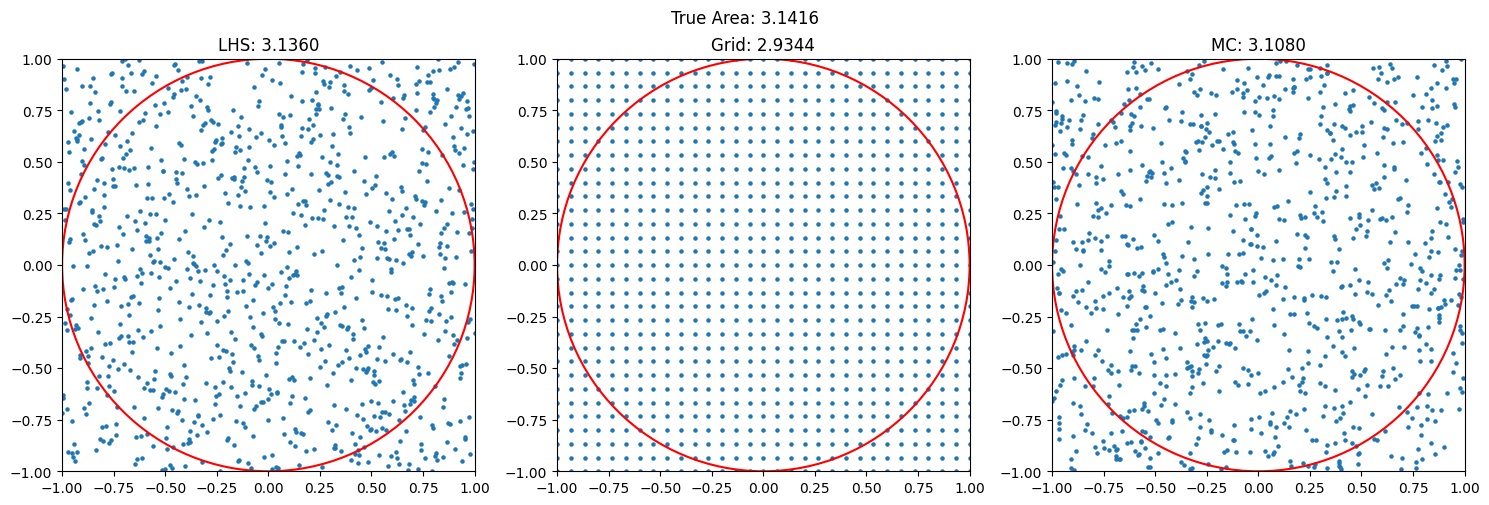

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc
import matplotlib.patches as patches

# Circle parameters
radius = 1.0
area_true = np.pi * radius**2
n_samples = 1000

# --- Latin Hypercube Sampling ---
lhs_sampler = qmc.LatinHypercube(d=2)
lhs_samples = lhs_sampler.random(n=n_samples)
lhs_samples = 2 * lhs_samples - 1  # map from [0,1] to [-1,1]

# --- Grid Sampling ---
grid_side = int(np.sqrt(n_samples))
x = np.linspace(-1, 1, grid_side)
y = np.linspace(-1, 1, grid_side)
xx, yy = np.meshgrid(x, y)
grid_points = np.vstack([xx.ravel(), yy.ravel()]).T

# --- Monte Carlo Sampling ---
mc_samples = 2 * np.random.rand(n_samples, 2) - 1  # uniform in [-1, 1]^2

# --- Function to estimate area ---
def estimate_area(points):
    inside = np.sum(points[:, 0]**2 + points[:, 1]**2 <= radius**2)
    return (4 * inside) / len(points)  # square area = 4

# --- Estimate areas ---
lhs_area = estimate_area(lhs_samples)
grid_area = estimate_area(grid_points)
mc_area = estimate_area(mc_samples)

# --- Plotting ---
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot settings
def plot_samples(ax, samples, title):
    ax.scatter(samples[:, 0], samples[:, 1], s=5)
    circle = patches.Circle((0, 0), radius, fill=False, edgecolor='red', linewidth=1.5)
    ax.add_patch(circle)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')
    ax.set_title(title)

plot_samples(axs[0], lhs_samples, f'LHS: {lhs_area:.4f}')
plot_samples(axs[1], grid_points, f'Grid: {grid_area:.4f}')
plot_samples(axs[2], mc_samples, f'MC: {mc_area:.4f}')

plt.suptitle(f'True Area: {area_true:.4f}')
plt.tight_layout()
plt.show()


(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)


/var/folders/9p/c80ms72x1zq5xk4ppbknqzlm0000gn/T/ipykernel_71847/2824867094.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([errors_lhs, errors_grid, errors_mc], labels=['LHS', 'Grid', 'MC'])


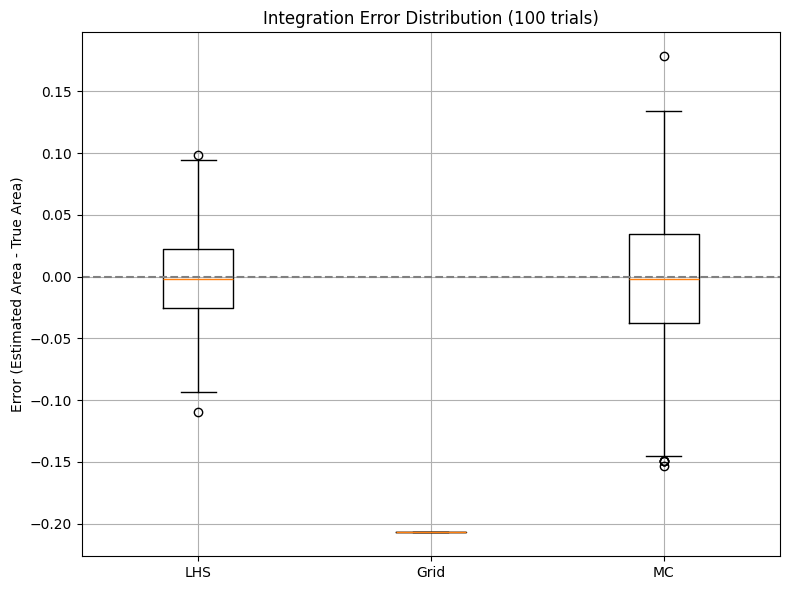

{'Variance_LHS': np.float64(0.001082976000000002),
 'Variance_Grid': np.float64(0.0),
 'Variance_MC': np.float64(0.0028729528160000035)}

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc
import matplotlib.patches as patches

# Parameters
radius = 1.0
area_true = np.pi * radius**2
n_samples = 1000
n_trials = 1000

# Storage for errors
errors_lhs = []
errors_grid = []
errors_mc = []

# Function to estimate area
def estimate_area(points):
    inside = np.sum(points[:, 0]**2 + points[:, 1]**2 <= radius**2)
    return (4 * inside) / len(points)

# Repeat sampling and estimation
for _ in range(n_trials):
    # LHS
    lhs_sampler = qmc.LatinHypercube(d=2)
    lhs_samples = lhs_sampler.random(n=n_samples)
    lhs_samples = 2 * lhs_samples - 1
    print(lhs_samples.shape)

    lhs_area = estimate_area(lhs_samples)
    errors_lhs.append(lhs_area - area_true)

    # Grid
    grid_side = int(np.sqrt(n_samples))
    x = np.linspace(-1, 1, grid_side)
    y = np.linspace(-1, 1, grid_side)
    xx, yy = np.meshgrid(x, y)
    grid_points = np.vstack([xx.ravel(), yy.ravel()]).T
    grid_area = estimate_area(grid_points)
    errors_grid.append(grid_area - area_true)

    # Monte Carlo
    mc_samples = 2 * np.random.rand(n_samples, 2) - 1
    mc_area = estimate_area(mc_samples)
    errors_mc.append(mc_area - area_true)

# Compute variances
var_lhs = np.var(errors_lhs)
var_grid = np.var(errors_grid)
var_mc = np.var(errors_mc)

# Boxplot
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot([errors_lhs, errors_grid, errors_mc], labels=['LHS', 'Grid', 'MC'])
ax.axhline(0, color='gray', linestyle='--')
ax.set_title('Integration Error Distribution (100 trials)')
ax.set_ylabel('Error (Estimated Area - True Area)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display variances
{
    "Variance_LHS": var_lhs,
    "Variance_Grid": var_grid,
    "Variance_MC": var_mc
}


In [11]:
type([]) == list

True

In [14]:
lhs_sampler

In [19]:
type(lhs_samples) == np.ndarray

True

In [21]:
# Generic imports
#%%
import os
import random
import shutil
import progress.bar
from   datetime import datetime
from scipy.stats import qmc


# Custom imports
from shapes import *
from meshes import *

n_sampling_pts = 50
mesh_domain    = False
plot_pts       = True
show_quadrants = True
n_shapes       = 10
time           = datetime.now().strftime('%Y-%m-%d_%H_%M_%S')
dataset_dir    = 'dataset_'+time+'/'
mesh_dir       = dataset_dir+'meshes/'
img_dir        = dataset_dir+'images/'
det_img_dir    = dataset_dir+'det_images/'

filename       = 'shape'
magnify        = 1.0
max_radius = (2)**0.5
xmin           =-2.0
xmax           = 2.0
ymin           =-2.0
ymax           = 2.0
n_tri_max      = 5000
n_pts = 4

### generate latin hypercube points in the defined space
equ_dim_lim = 2
latin_gen = False
latin_gen = qmc.LatinHypercube(d=n_pts*2)
latin_gen = latin_gen.random(n=n_shapes)
latin_gen = equ_dim_lim * latin_gen

In [25]:
latin_gen[0,:].reshape(-1,2)

array([[0.63779148, 1.33718214],
       [1.44815483, 0.22925257],
       [1.29895158, 1.99515605],
       [0.82047098, 1.75375766]])

100: [300]
101: [299, 301]
102: [299, 302]
103: [298, 303]
104: [298, 304]
105: [298, 305]
106: [297, 306]
107: [297, 307]
108: [296, 308]
109: [296, 309]
110: [296, 310]
111: [295, 311]
112: [295, 312]
113: [294, 313]
114: [294, 314]
115: [294, 315]
116: [293, 316]
117: [293, 317]
118: [292, 318]
119: [292, 319]
120: [292, 320]
121: [291, 321]
122: [291, 322]
123: [290, 323]
124: [290, 324]
125: [290, 325]
126: [289, 326]
127: [289, 327]
128: [288, 328]
129: [288, 329]
130: [288, 330]
131: [287, 331]
132: [287, 332]
133: [286, 333]
134: [286, 334]
135: [286, 335]
136: [285, 336]
137: [285, 337]
138: [284, 338]
139: [284, 339]
140: [284, 340]
141: [283, 341]
142: [283, 342]
143: [282, 343]
144: [282, 344]
145: [282, 345]
146: [281, 346]
147: [281, 347]
148: [280, 348]
149: [280, 349]
150: [280, 350]
151: [279, 351]
152: [279, 352]
153: [278, 353]
154: [278, 354]
155: [278, 355]
156: [277, 356]
157: [277, 357]
158: [276, 358]
159: [276, 359]
160: [276, 360]
161: [275, 361]
162: [275, 36

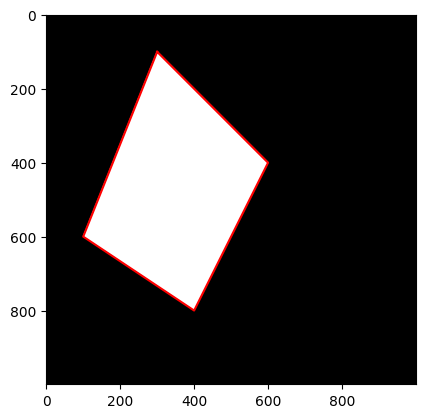

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def scanline_fill(polygon, width, height):
    # Convert to integer pixel coordinates
    polygon = np.array(polygon, dtype=int)
    filled = np.zeros((height, width), dtype=np.uint8)

    ymin = np.min(polygon[:,1])
    ymax = np.max(polygon[:,1])

    for y in range(ymin, ymax + 1):
        intersections = []
        for i in range(len(polygon)):
            p1 = polygon[i]
            p2 = polygon[(i + 1) % len(polygon)]
            if p1[1] == p2[1]: continue  # skip horizontal edges
            if (y < min(p1[1], p2[1])) or (y > max(p1[1], p2[1])): continue
            # Compute intersection x
            x = int(p1[0] + (y - p1[1]) * (p2[0] - p1[0]) / (p2[1] - p1[1]))
            intersections.append(x)
        intersections.sort()
        unique_list = []
        seen = set()
        for item in intersections:
            if item not in seen:
                seen.add(item)
                unique_list.append(item)
        intersections = unique_list
        print(f"{y}: {intersections}")
        for i in range(0, len(intersections), 2):
            if i + 1 < len(intersections):
                x_start = intersections[i]
                x_end = intersections[i + 1]
                filled[y, x_start:x_end+1] = 1
    return filled

# Example polygon
polygon = [(300, 100), (600, 400), (400, 800), (100, 600)]
img = scanline_fill(polygon, width=1000, height=1000)

plt.imshow(img, cmap='gray')
plt.plot(*zip(*polygon + [polygon[0]]), color='red')  # polygon outline
plt.show()


In [30]:
img.shape

(100, 100)